In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from perceptron import Perceptron

In [2]:
df = pd.read_csv('Inputs/weatherHIstory.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
df = df[['Formatted Date', 'Temperature (C)']]
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], yearfirst=True)
df['Short Date'] = df['Formatted Date'].map(lambda date:f'{date.year}-{date.month}-{date.day}')
# df['Day_of_Year'] = pd.to_datetime(df['Date']).dt.dayofyear
df = df.sort_values(by=['Formatted Date'], ascending=True).reset_index(drop=True)
df.head(-10)

,Formatted Date,Temperature (C),Short Date
0,2006-01-01 00:00:00+01:00,0.577778,2006-1-1
1,2006-01-01 01:00:00+01:00,1.161111,2006-1-1
2,2006-01-01 02:00:00+01:00,1.666667,2006-1-1
3,2006-01-01 03:00:00+01:00,1.711111,2006-1-1
4,2006-01-01 04:00:00+01:00,1.183333,2006-1-1
...,...,...,...
96438,2016-12-31 09:00:00+01:00,-0.194444,2016-12-31
96439,2016-12-31 10:00:00+01:00,0.705556,2016-12-31
96440,2016-12-31 11:00:00+01:00,1.550000,2016-12-31
96441,2016-12-31 12:00:00+01:00,2.222222,2016-12-31


In [4]:
data = df.groupby(['Short Date'])['Temperature (C)'].mean().reset_index()
data['Date'] = pd.to_datetime(data['Short Date'], yearfirst=True)
data =data.sort_values(by=['Date'], ascending=True).reset_index(drop=True)
data['Day_of_Year'] = pd.to_datetime(data['Date']).dt.dayofyear
data.head(-10)

,Short Date,Temperature (C),Date,Day_of_Year
0,2006-1-1,3.873148,2006-01-01,1
1,2006-1-2,5.418519,2006-01-02,2
2,2006-1-3,2.319444,2006-01-03,3
3,2006-1-4,2.274074,2006-01-04,4
4,2006-1-5,2.698148,2006-01-05,5
...,...,...,...,...
4003,2016-12-17,1.027546,2016-12-17,352
4004,2016-12-18,0.938657,2016-12-18,353
4005,2016-12-19,0.853009,2016-12-19,354
4006,2016-12-20,0.769907,2016-12-20,355


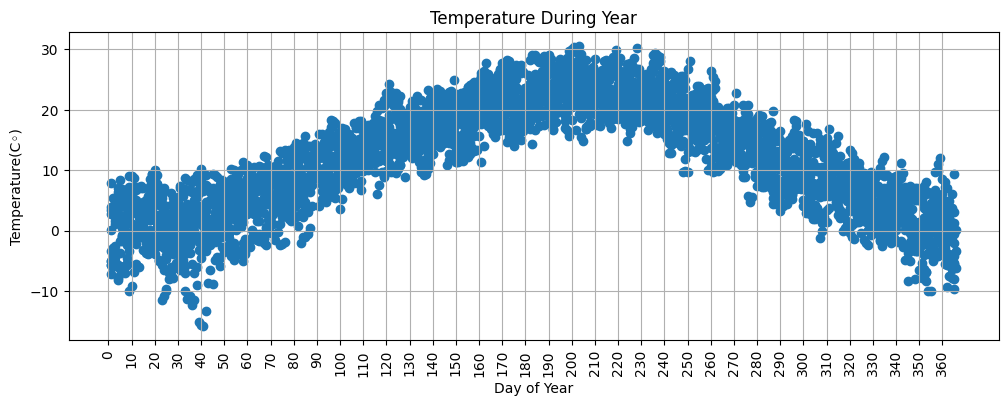

In [5]:
plt.figure(figsize=(12, 4))
plt.scatter(data['Day_of_Year'], data['Temperature (C)'])
plt.title('Temperature During Year')
plt.xlabel('Day of Year')
plt.ylabel('Temperature(C◦)')
plt.xticks(np.arange(0, 365, 10), rotation='vertical')
plt.grid()
plt.show()


In [6]:
X = data[['Day_of_Year']].copy().to_numpy(int)
Y = data[['Temperature (C)']].copy().values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape,

((3214, 1), (804, 1), (3214, 1), (804, 1))

In [46]:
model = Perceptron(input_length=X_train.shape[1], learning_rate=0.00001, type_of_data='regression',function='linear')
model.fit(X_train, X_test, Y_train, Y_test, epochs=200)

  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:16<00:00, 12.15it/s]


In [47]:
model.evaluate(X_test, Y_test)

(76.0369372937121, 0.0027860516637721044)

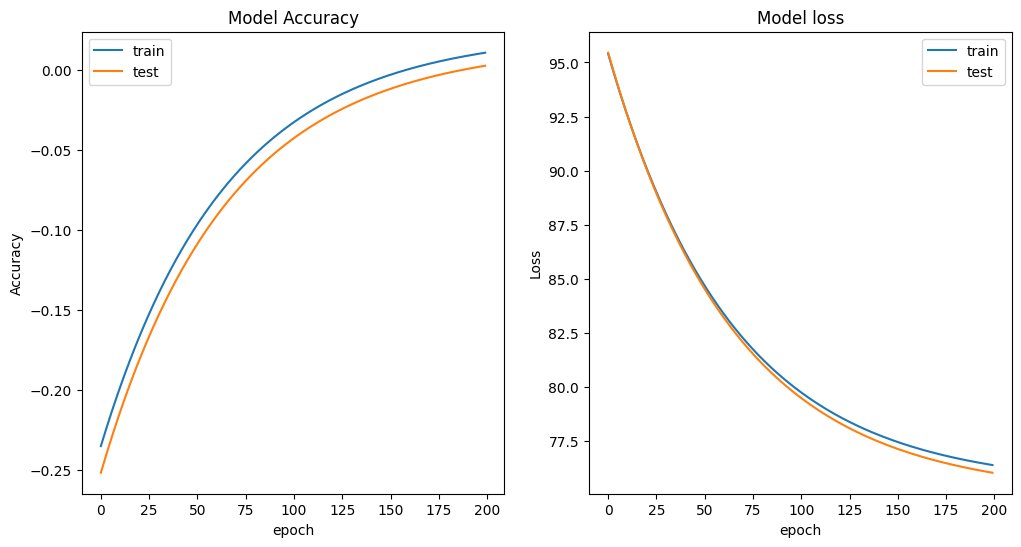

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

ax1.plot(model.train_accuracies)
ax1.plot(model.test_accuracies)
ax1.set_title("Model Accuracy")
ax1.set_xlabel("epoch")
ax1.set_ylabel("Accuracy")
ax1.legend(['train','test'])

ax2.plot(model.train_losses)
ax2.plot(model.test_losses)
ax2.set_title("Model loss")
ax2.set_xlabel("epoch")
ax2.set_ylabel("Loss")
ax2.legend(['train','test'])

plt.show()


In [49]:
model.predict([100])

array([[9.45342041]])

In [50]:
np.save("Outputs/Weather_Prediction_Weights.npy", model.weights)
np.save("Outputs/Weather_Prediction_Bias.npy", model.bias)